# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

### Datetime manipulations

The Data Wrangling course started on Monday 7 January 2019 at 9 am and will end on Friday 1 February at 5.15 pm. Calculate the duration of the course in minutes. Assign the value to the variable *duration*.


In [2]:
from datetime import datetime

# YOUR CODE HERE
duration = (datetime(year=2019, month=2, day=1, hour=17, minute=15) - datetime(year=2019, month=1, day=7, hour=9, minute=0)).total_seconds() / 60
# YOUR CODE ENDS HERE

In [3]:
print(duration)


36495.0


Below you will find the scheduled days of the course Data Wrangling. The values in the time series denote the number of contact hours spend on each lecture. Create a time series that calculates the cumulative sum of all the hours that you have spent on the course. Assign the cumulate sum on 29 January 2019 to the variable *cum_hours*.

In [4]:
from datetime import datetime
from pandas.tseries.offsets import *


dates = [datetime(2019, 1, 7), datetime(2019, 1, 8), datetime(2019, 1, 10),
         datetime(2019, 1, 14), datetime(2019, 1, 15), datetime(2019, 1, 17),
         datetime(2019, 1, 21), datetime(2019, 1, 22), datetime(2019, 1, 24),
         datetime(2019, 1, 30), datetime(2019, 1, 31), datetime(2019, 2, 1)]
ts = pd.Series([2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 3, 3], index = dates)

# YOUR CODE HERE
cum_hours = 0

for date in ts.index:
    if date <= datetime(2019, 1, 29):
        cum_hours += ts[date]
# YOUR CODE ENDS HERE

In [5]:
print(cum_hours)


15


Suppose that you want to become a world-class expert in data wrangling. So, you decide to spent 2 hours learning data wrangling every Tuesday in 2019. As you have a lot of free time every first Wednesday of the month, you spent 3 hours learning data wrangling those days in 2019. Calculate how many hours you will spend learning in 2019. Assign that value to the variable *study_hours*.

In [6]:
from datetime import datetime, timedelta

# YOUR CODE HERE
study_hours = 0

for single_date in (datetime(2019,1,1) + timedelta(n) for n in range(365)):
    if single_date.weekday() == 1:
        study_hours += 2
        
for single_date in (datetime(2019,1,1) + timedelta(n) for n in range(365)):
    if single_date.weekday() == 2 and single_date.day <= 7:
        study_hours += 3
    

# YOUR CODE ENDS HERE

In [7]:
print(study_hours)


142


Generate all business days in 2019 that start at the first weekday of the month. Calculate how many of these days fall on the second day of the month. Assign that value to the variable *second_days*.

In [8]:
from datetime import datetime

# YOUR CODE HERE
second_days = 0

for single_date in (datetime(2019,1,1) + timedelta(n) for n in range(365)):
    if single_date.weekday() == 0 and single_date.day == 2:
        second_days += 1
        
# YOUR CODE ENDS HERE

In [9]:
print(second_days)


2


The blood moon was best visible on 21 January 2019 at 05.41 am in Amsterdam. Calculate what the time was in Sydney (Australia) at that exact moment. Assign the answer to *bloodmoon*.

In [10]:
from datetime import datetime
import pytz

# YOUR CODE HERE
bloodmoon = datetime(2019, 1, 21, hour=5, minute=41).astimezone(pytz.timezone('Australia/Sydney'))
# YOUR CODE ENDS HERE

In [11]:
print(bloodmoon)


2019-01-21 15:41:00+11:00


### Sales volumes

The file *volume.csv* contains sales volumes of different companies. Read the file, and calculate the mean sales volumes of each company in the year 2010. Assign the series to the variable *volumes2010*. 

In [12]:
file = 'volume.csv'

# YOUR CODE HERE
df = pd.read_csv(file)

only2010 = df[(df['Unnamed: 0'] > '2010-01-01 00:00:00') & (df['Unnamed: 0'] < '2010-12-31 00:00:00')]  

volumes2010 = only2010.mean()
# YOUR CODE ENDS HERE

In [13]:
print(volumes2010)


AA      3.120602e+07
AAPL    2.146150e+07
GE      7.241850e+07
IBM     6.436573e+06
JNJ     1.217533e+07
MSFT    6.321981e+07
PEP     6.978380e+06
SPX     4.577267e+09
XOM     2.647669e+07
dtype: float64


In which year did the sales volume of Apple (*AAPL*) overtake the sales volume of Microsoft (*MSFT*)? Calculate the value and assign the timestamp to the variable *changeover*.

In [14]:
file = 'volume.csv'

# YOUR CODE HERE
df = pd.read_csv(file)
       
for index, row in df.iterrows():
    if row['AAPL'] > row['MSFT']:
        changeover = row['Unnamed: 0']
        break

# YOUR CODE ENDS HERE

In [15]:
print(changeover)


1992-08-06 00:00:00


Format the date that you have found in a nicer way corresponding to the style dd/mm/yy. Thus, the day (dd), month (mm), and the year (yy) are formatted in 2 digits, separated by slashes. Assign the value to the variable *nicedate*.

In [16]:
# YOUR CODE HERE
nicedate = datetime.strptime(changeover, '%Y-%m-%d %H:%M:%S').strftime('%d/%m/%y')
# YOUR CODE ENDS HERE

In [17]:
print(nicedate)


06/08/92


Apple has to report every end of the year (31 December) what its current sales volume is (not cumulative!). Create a time series for every year with the sales volume listed for Apple (AAPL) on 31 December. If the data does not contain a record for this date, then take the last known value that this known prior to that date. Assign the time series to the variable *apple_report*.

In [18]:
# YOUR CODE HERE
apple_df = df[['Unnamed: 0', 'AAPL']]

for i in range(0, apple_df.shape[0]):
    apple_df.set_value(i, 'Unnamed: 0', datetime.strptime(apple_df.iloc[i]['Unnamed: 0'], '%Y-%m-%d %H:%M:%S'))
    
data_points = {}
for index, row in apple_df.iterrows():
    data_points[row['Unnamed: 0'].year] = row
        
volume_list = []
date_index = []
for key in data_points.keys():
    volume_list.append(data_points[key]['AAPL'])
    date_index.append(data_points[key]['Unnamed: 0'])
    
apple_report = pd.Series(volume_list, index=date_index)

# YOUR CODE ENDS HERE

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [19]:
print(apple_report)


1990-12-31     1593200.0
1991-12-31     4802000.0
1992-12-31     3302000.0
1993-12-31     5765200.0
1994-12-30     2616400.0
1995-12-29    10874400.0
1996-12-31    13719200.0
1997-12-31    14531200.0
1998-12-31     9716400.0
1999-12-31     5856400.0
                 ...    
2002-12-31     7168800.0
2003-12-31     6230400.0
2004-12-31     9949600.0
2005-12-30    22295100.0
2006-12-29    38443900.0
2007-12-31    19261900.0
2008-12-31    21697900.0
2009-12-31    12586100.0
2010-12-31     6911000.0
2011-10-14    20450000.0
Length: 22, dtype: float64


The volumes of Apple are highly fluctuating over time. You can clearly see that when you make a plot. It would be better to smooth out the sales volume by taking a moving average with a period of 200 days. Calculate the moving average of the sales volume and assign to the variable *apple_smooth*. Create a plot with the original time series and the smooth version of the time series.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


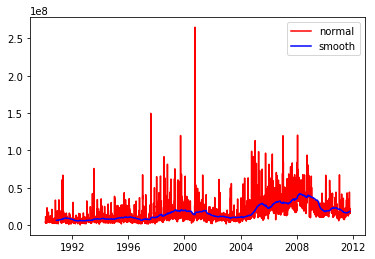

In [23]:
# YOUR CODE HERE
apple_df = df[['Unnamed: 0', 'AAPL']]

for i in range(0, apple_df.shape[0]):
    apple_df.set_value(i, 'Unnamed: 0', datetime.strptime(apple_df.iloc[i]['Unnamed: 0'], '%Y-%m-%d %H:%M:%S'))

apple_df = apple_df.set_index('Unnamed: 0')
apple_smooth = apple_df.rolling(200).mean().dropna()
plt.plot(apple_df['AAPL'], color='r')
plt.plot(apple_smooth['AAPL'], color='b')
plt.legend(['normal', 'smooth'])
# YOUR CODE ENDS HERE